# PROJECT ON  -      BIKE SHARING DEMAND PREDICTION

# Importing  libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

# 1. Reading the dataset

In [2]:
dataset = pd.read_csv("boombikes.csv")

In [3]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
dataset.shape


(730, 16)

In [5]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#Assigning string values to different seasons instead of numeric values 

#1 = spring
dataset.loc[(dataset['season'] == 1),'season'] = 'spring'

#2 = spring
dataset.loc[(dataset['season'] == 2),'season'] = 'summer'

#3 = spring
dataset.loc[(dataset['season'] == 3),'season'] = 'fall'

#4 = spring
dataset.loc[(dataset['season'] == 4),'season'] = 'winter'

In [9]:
dataset['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [10]:
#0 = 2018, #1 = 2019 : Year
dataset['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [11]:
#Assigningstring values to differenrt months instead of numeric values
def object_map_mnths(x):
    return x.map({1: 'Jan',2: 'Feb',3: 'March',4: 'April',5: 'May',6: 'June',7: 'July',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec',})

In [12]:
dataset[['mnth']] = dataset[['mnth']].apply(object_map_mnths)

In [13]:
dataset['mnth'].astype('category').value_counts()

Aug      62
Dec      62
Jan      62
July     62
March    62
May      62
Oct      62
April    60
June     60
Nov      60
Sep      60
Feb      56
Name: mnth, dtype: int64

In [14]:
dataset['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [15]:
def str_map_weekday(x):
    return x.map({1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat',7: 'Sun',})

In [16]:
dataset[['weekday']] = dataset[['weekday']].apply(object_map_mnths)

In [17]:
dataset['weekday'].astype('category').value_counts()

Feb      105
Jan      105
April    104
June     104
March    104
May      104
Name: weekday, dtype: int64

In [18]:
dataset['workingday'].astype('category').value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [19]:
# 1 Clear, few  clouds, partly cloudly
dataset.loc[(dataset['weathersit'] == 1), 'weathersit'] = 'A'

# 2 mist cloudly
dataset.loc[(dataset['weathersit'] == 2), 'weathersit'] = 'B'

# 3 light Snow, Heavy rain
dataset.loc[(dataset['weathersit'] == 3), 'weathersit'] = 'C'

In [20]:
dataset['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

# 2. Data Visualisation


<Axes: xlabel='temp', ylabel='Density'>

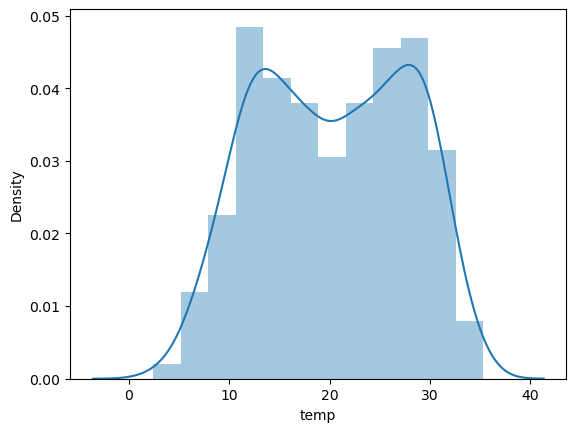

In [21]:
# Temperature
sns.distplot(dataset['temp'])

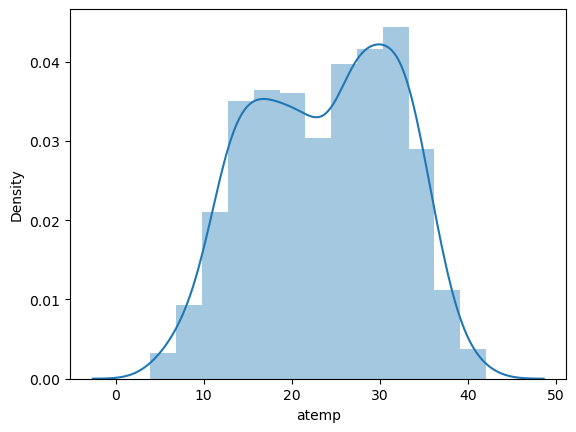

In [22]:
# Actual Temperature
sns.distplot(dataset['atemp'])
plt.show()

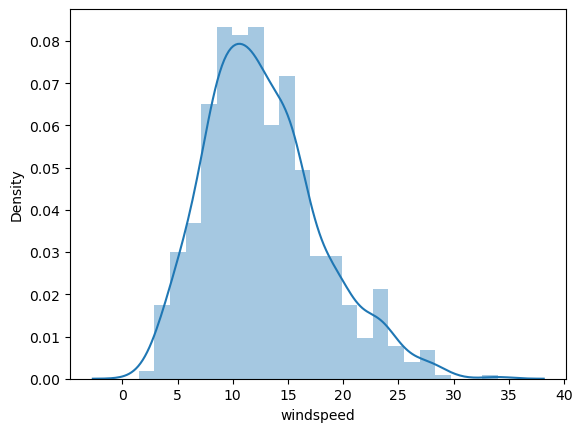

In [23]:
# Wind speed
sns.distplot(dataset['windspeed'])
plt.show()

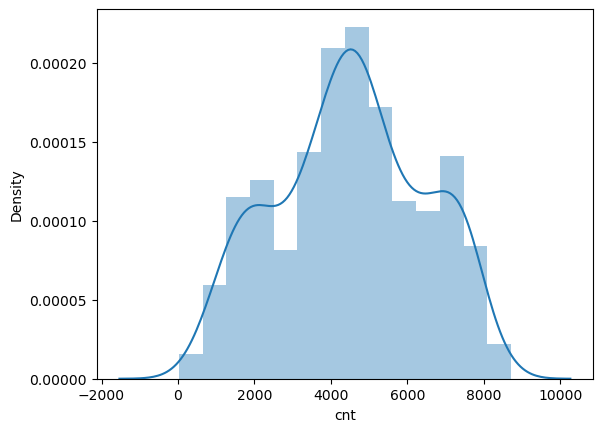

In [24]:
# Target variable: count of total rental bikes including both caual and registered
sns.distplot(dataset['cnt'])
plt.show()

In [25]:
# converting date to datetime format
dataset['dteday'] = dataset['dteday'].astype('datetime64')

In [26]:
dataset_categorical = dataset.select_dtypes(exclude=['float64','datetime64','int64'])

In [27]:
dataset_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [28]:
dataset_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Jan,B
1,spring,Jan,Feb,B
2,spring,Jan,March,A
3,spring,Jan,April,A
4,spring,Jan,May,A
...,...,...,...,...
725,spring,Dec,May,B
726,spring,Dec,June,B
727,spring,Dec,NaN,B
728,spring,Dec,Jan,A


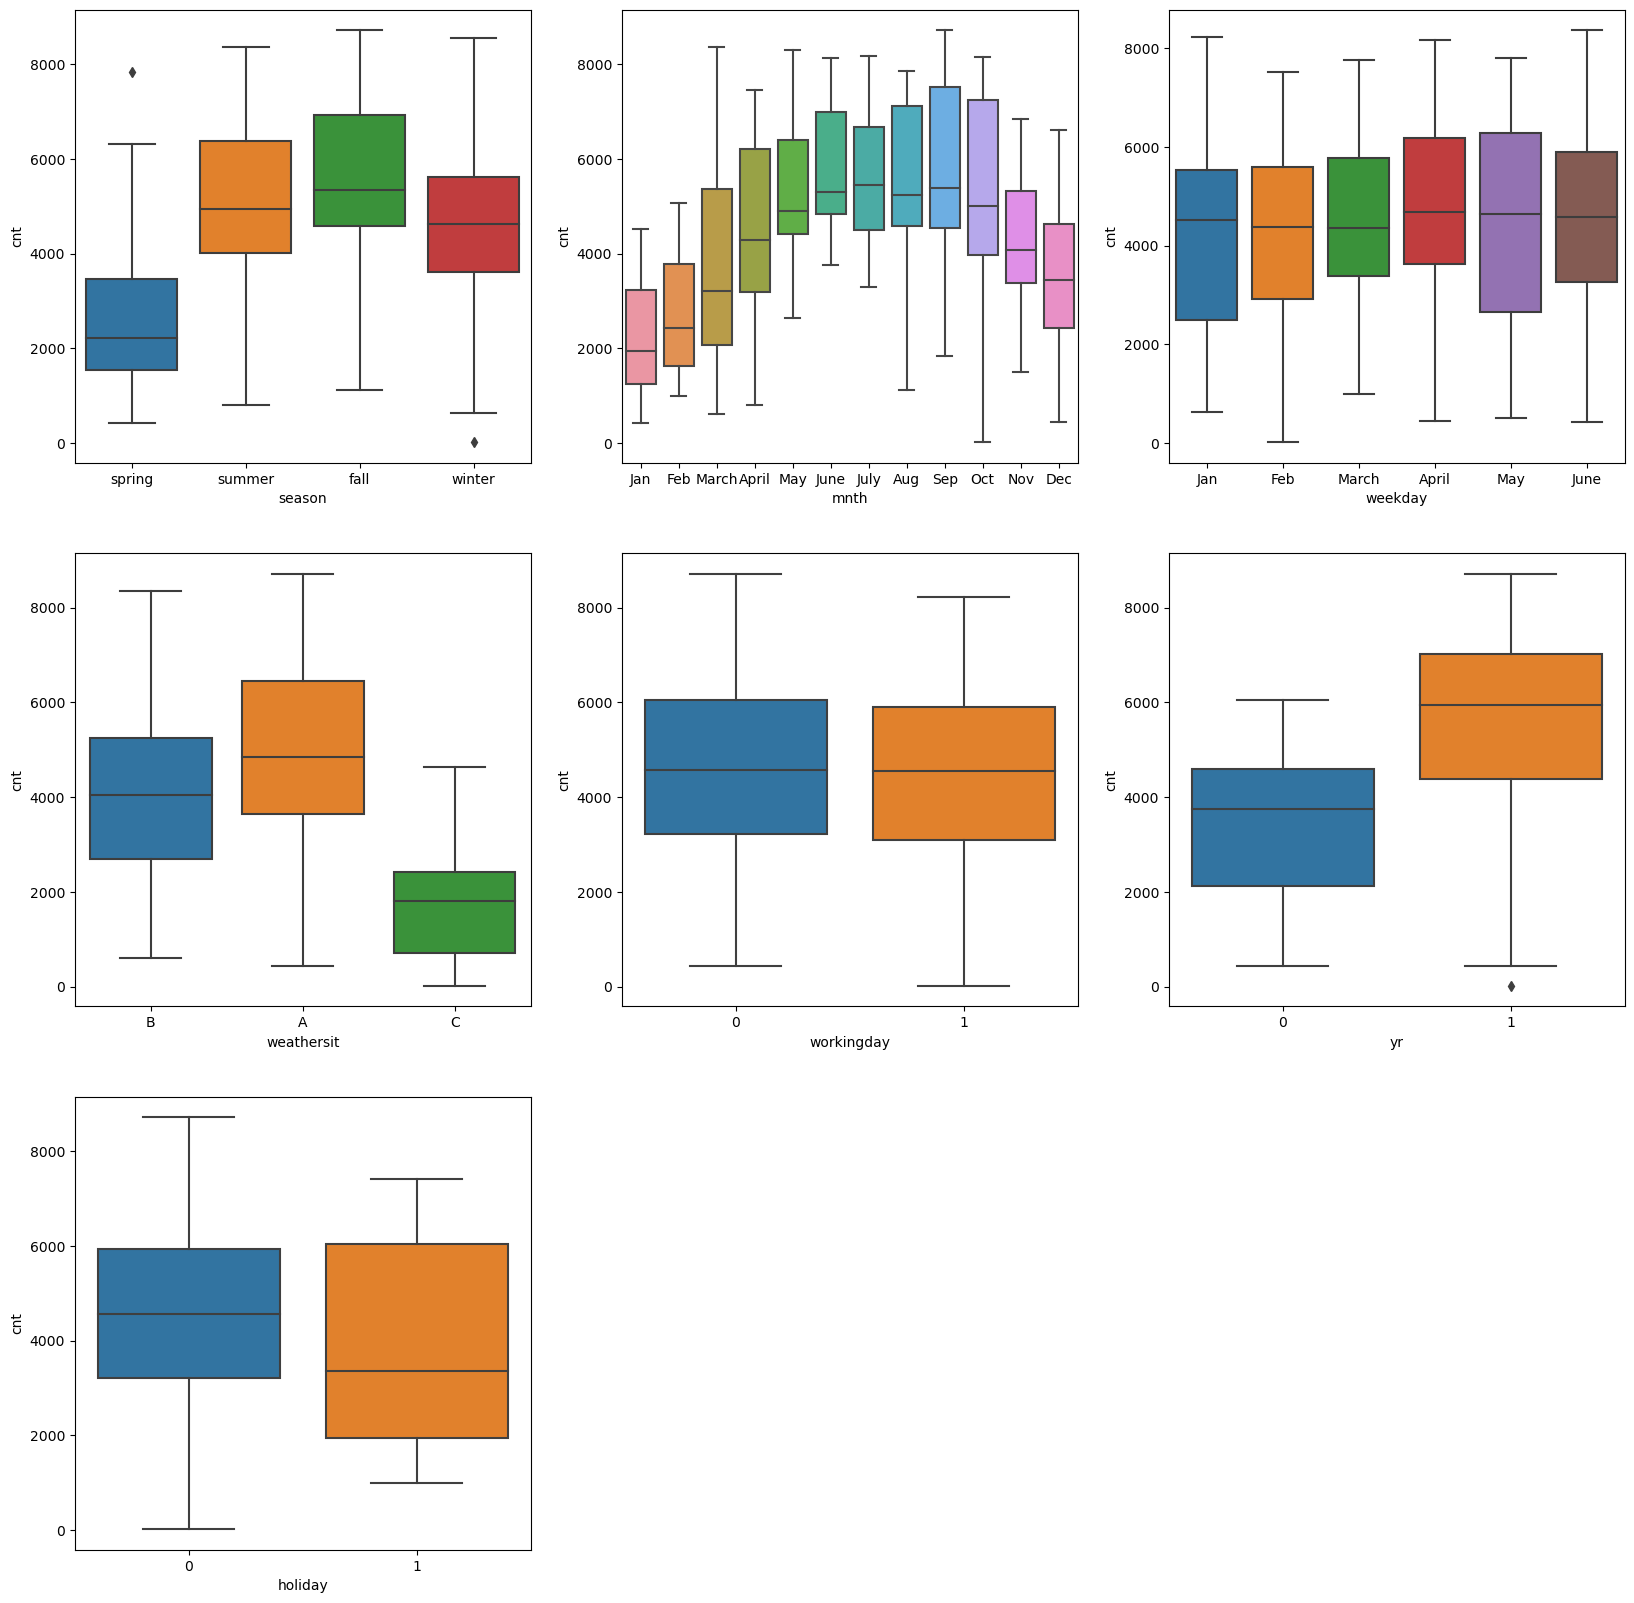

In [29]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x= 'season', y = 'cnt', data=dataset)
plt.subplot(3,3,2)
sns.boxplot(x= 'mnth', y = 'cnt', data=dataset)
plt.subplot(3,3,3)
sns.boxplot(x= 'weekday', y = 'cnt', data=dataset)
plt.subplot(3,3,4)
sns.boxplot(x= 'weathersit', y = 'cnt', data=dataset)
plt.subplot(3,3,5)
sns.boxplot(x= 'workingday', y = 'cnt', data=dataset)
plt.subplot(3,3,6)
sns.boxplot(x= 'yr', y = 'cnt', data=dataset)
plt.subplot(3,3,7)
sns.boxplot(x= 'holiday', y = 'cnt', data=dataset)
plt.show()

In [30]:
intVarlist = ["casual","registered", "cnt"]

for var in intVarlist:
    dataset[var] = dataset[var].astype("float")

In [31]:
dataset_numeric = dataset.select_dtypes(include=['float64'])
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


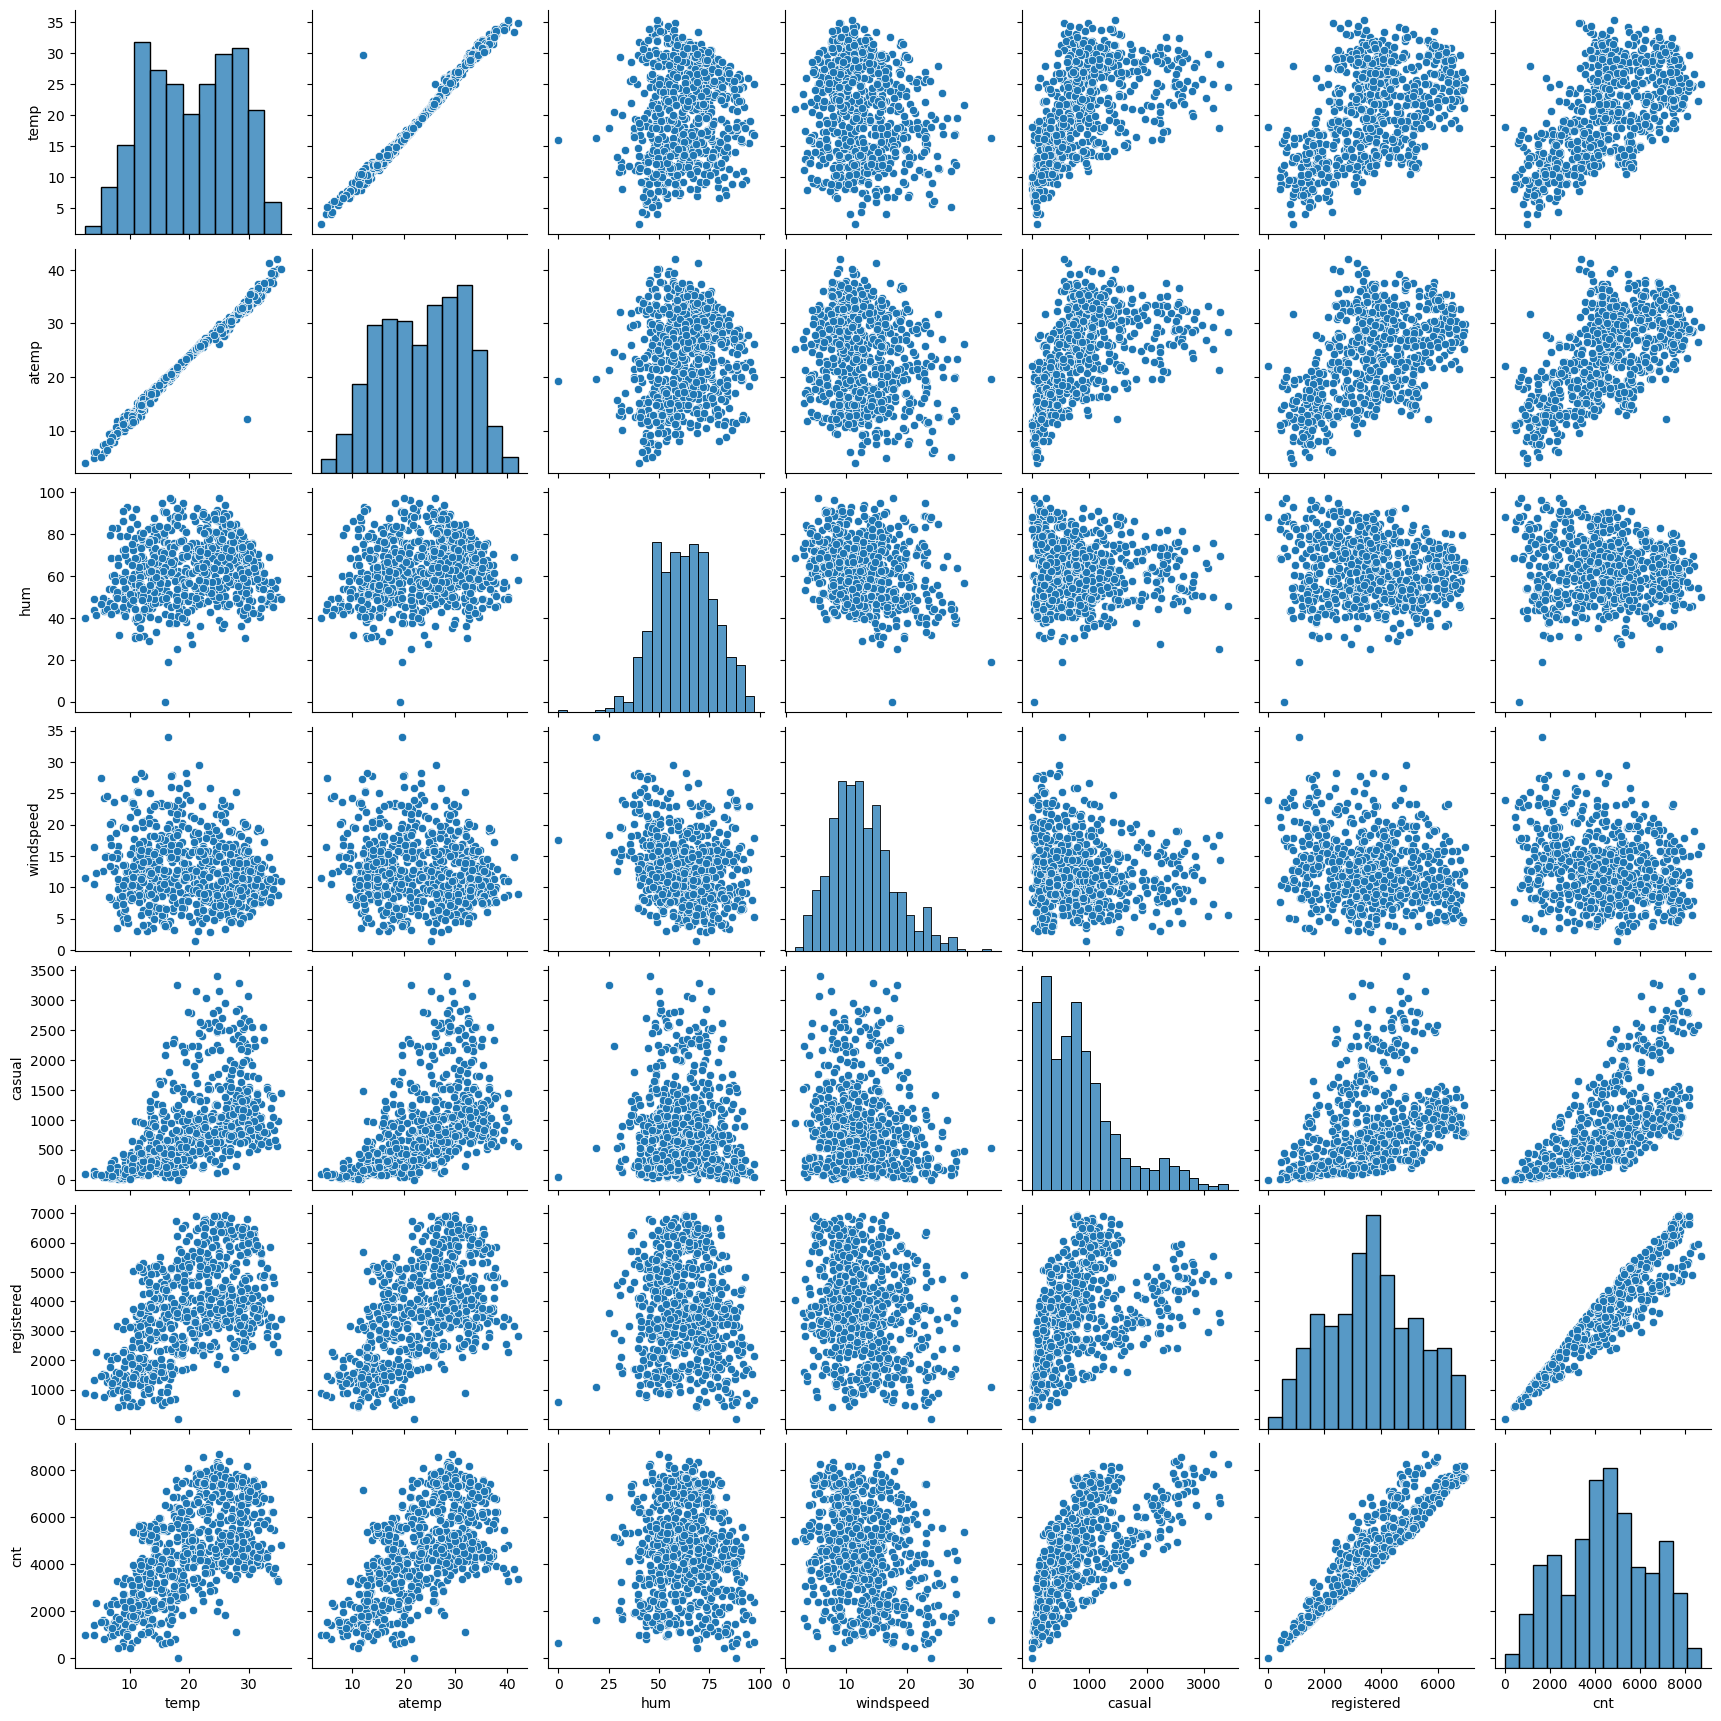

In [32]:
sns.pairplot(dataset_numeric)
plt.show()

In [33]:
cor = dataset_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

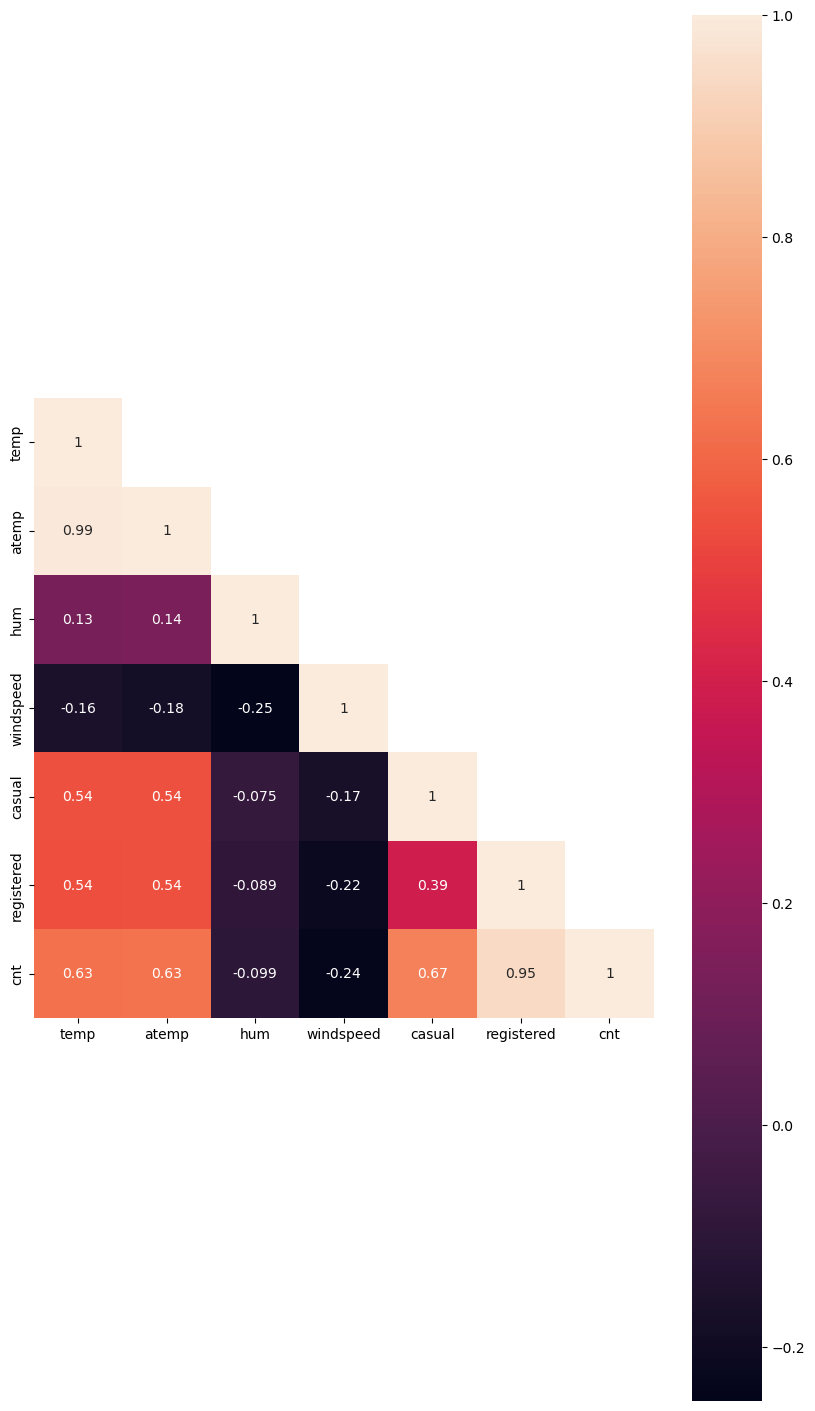

In [34]:
# Heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,18)
sns.heatmap(cor, mask=mask, vmax = 1 , square = True, annot = True)

In [35]:
# Removing atemp as it is highly corealed with temp
dataset.drop('atemp', axis=1, inplace=True)

In [36]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Jan,1,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,Jan,0,Feb,1,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,Jan,0,March,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,Jan,0,April,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,Jan,0,May,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


# 3. Data Preparation

In [37]:
dataset_categorical = dataset.select_dtypes(include=['object'])
dataset_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Jan,B
1,spring,Jan,Feb,B
2,spring,Jan,March,A
3,spring,Jan,April,A
4,spring,Jan,May,A


In [38]:
dataset_dummies = pd.get_dummies(dataset_categorical,drop_first = True)
dataset_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Feb,weekday_Jan,weekday_June,weekday_March,weekday_May,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
#Drop Categorical variable columns
dataset = dataset.drop(list(dataset_categorical.columns), axis=1)
dataset

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,0,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [40]:
# Concatenate dummy variables with the dataset
dataset = pd.concat([dataset, dataset_dummies], axis=1)

In [41]:
dataset.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Feb,weekday_Jan,weekday_June,weekday_March,weekday_May,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [42]:
dataset = dataset.drop(['instant','dteday'], axis=1, inplace=False)
dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Feb,weekday_Jan,weekday_June,weekday_March,weekday_May,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# 4. Model Building and Evaluation

In [43]:
#Import Libs
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [44]:
# Split the dataframe  into train and test datasets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 100)

In [45]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Feb,weekday_Jan,weekday_June,weekday_March,weekday_May,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
350,0,0,1,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()

In [48]:
# Apply scaler to all columns except dumy variables
var = ["temp","hum","windspeed","casual","registered","cnt"]

df_train[var] = scaler.fit_transform(df_train[var])

In [49]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Feb,weekday_Jan,weekday_June,weekday_March,weekday_May,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.152941,0.154902,0.129412,0.135294,0.147059,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.360284,0.362166,0.335985,0.342373,0.354512,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


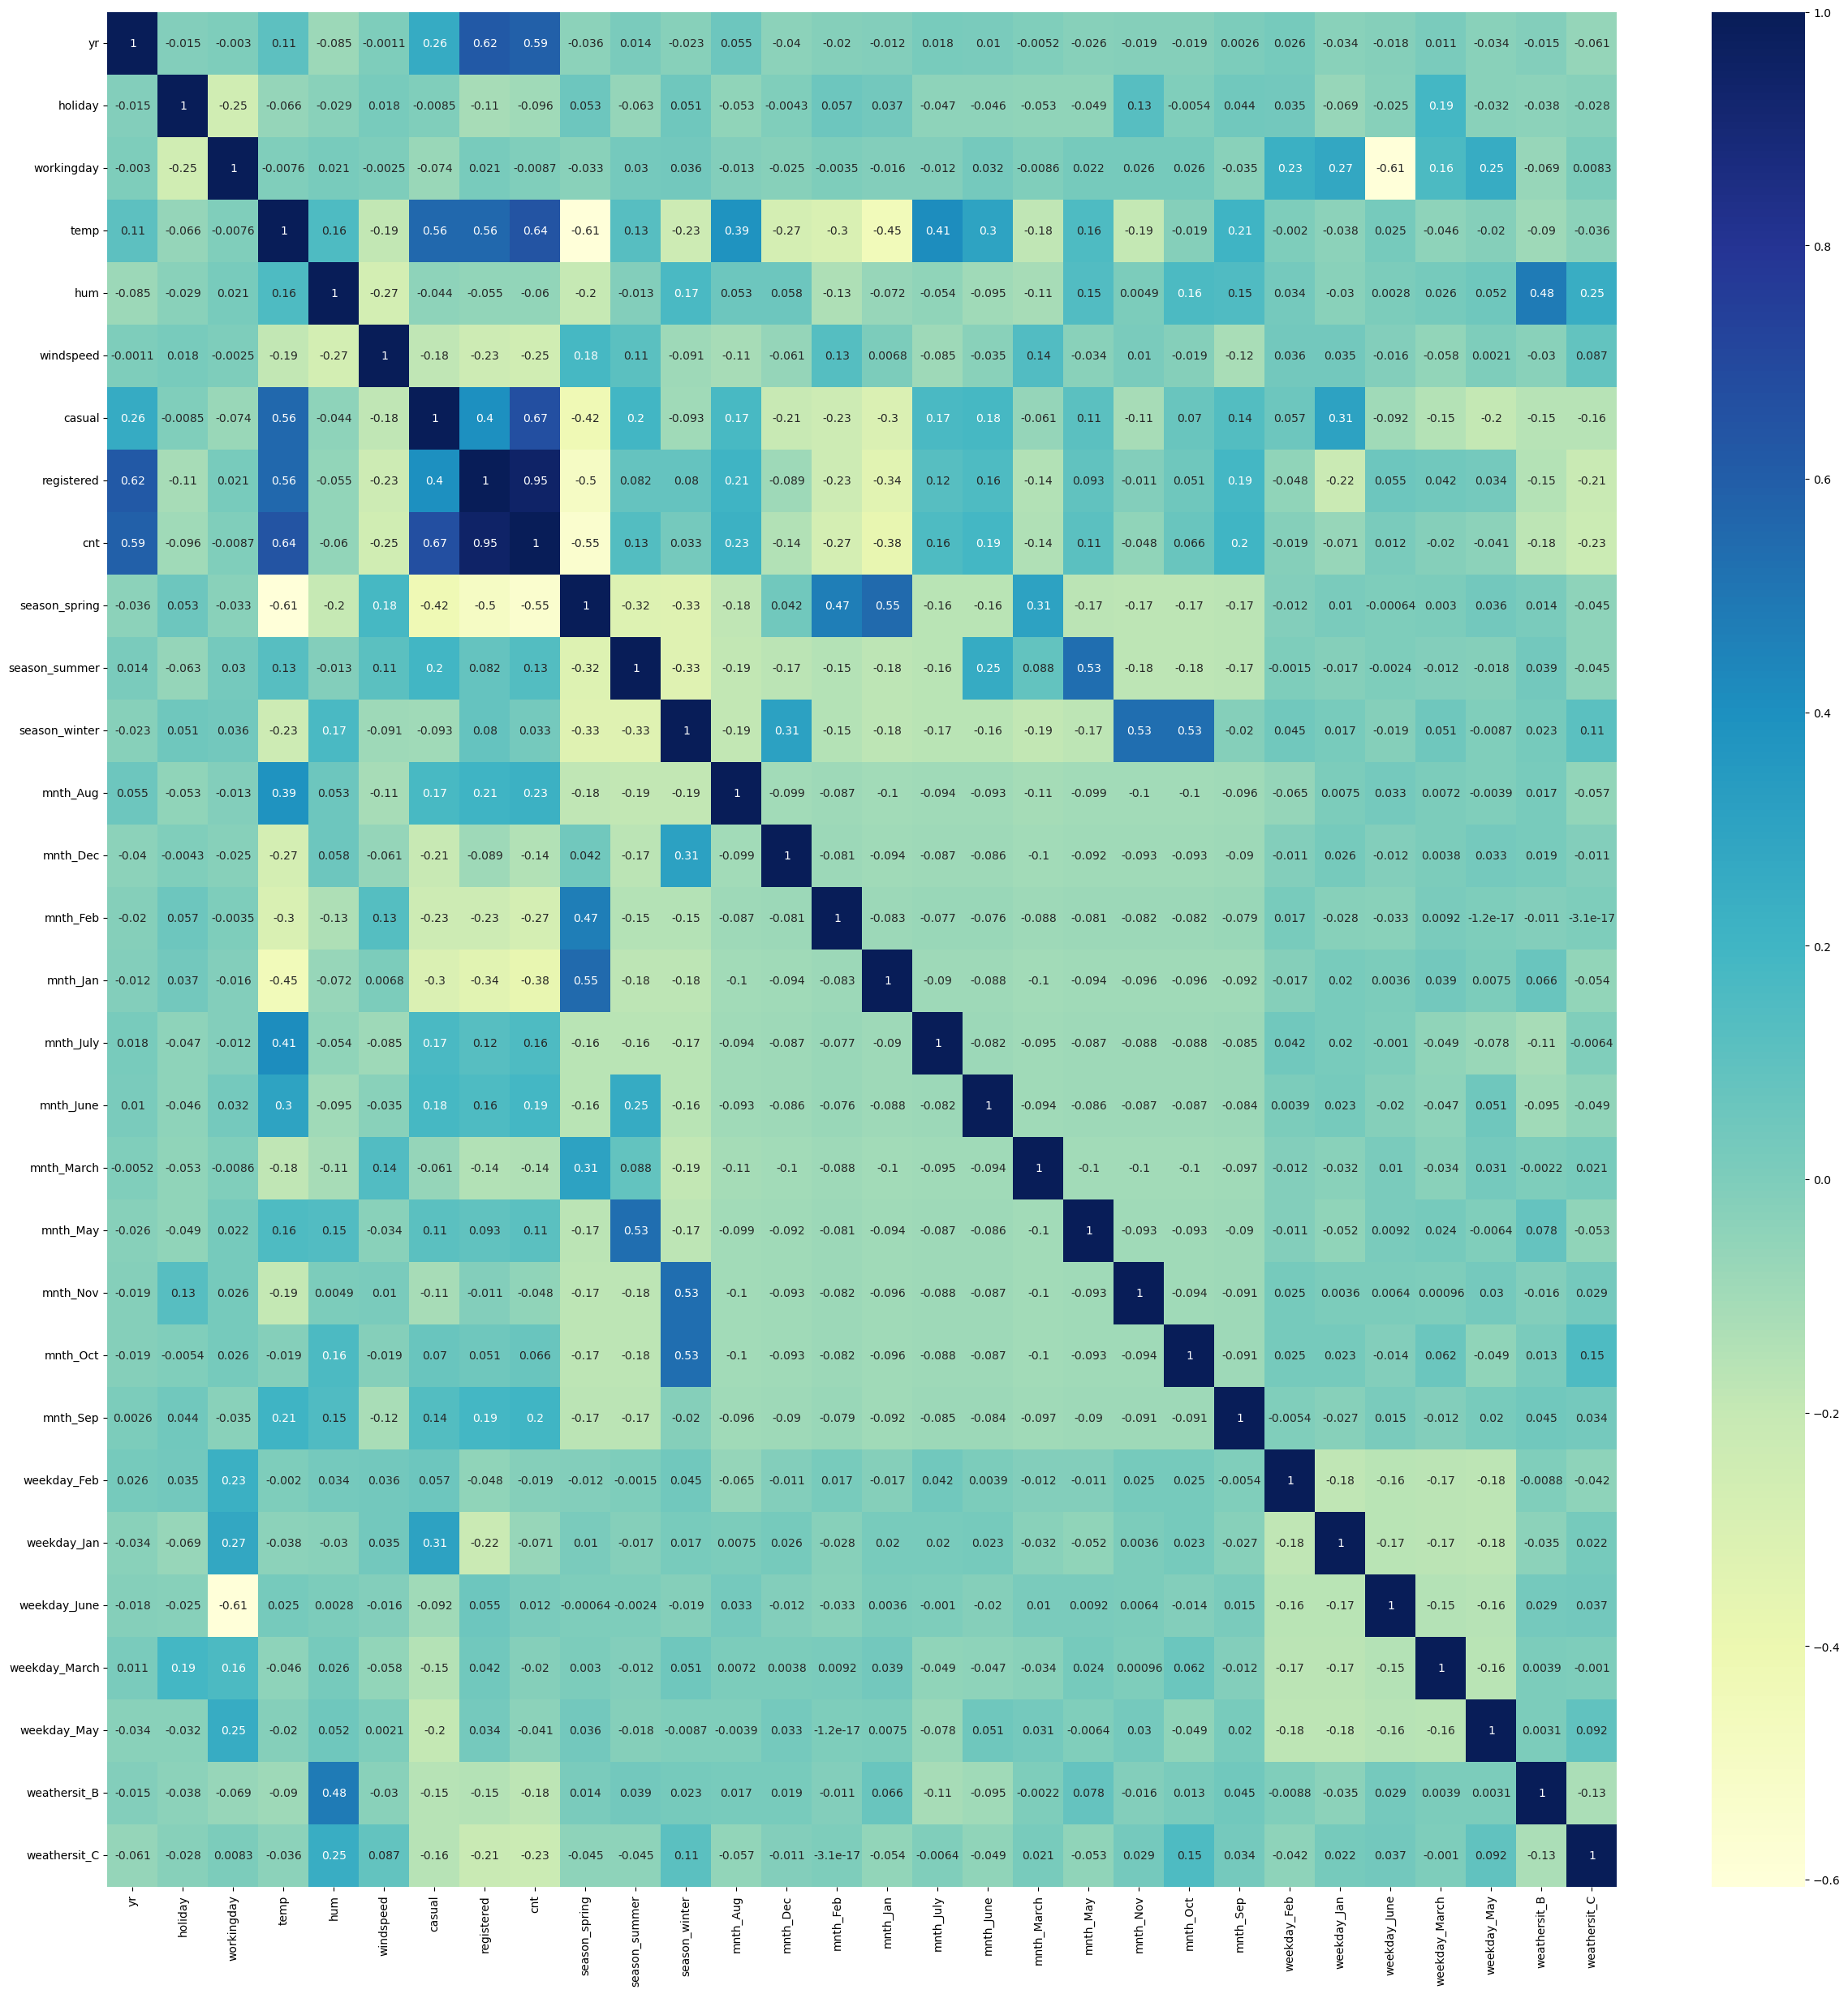

In [50]:
# Checking the corelation cofficeints to see which variables are highly correlated
plt.figure(figsize= (30,30))
sns.heatmap(df_train.corr(),annot = True, cmap = "YlGnBu")
plt.show()

In [51]:
# Diving into x and y
y_train = df_train.pop('cnt')
x_train = df_train.drop(["casual","registered"], axis=1)

In [52]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Feb,weekday_Jan,weekday_June,weekday_March,weekday_May,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [53]:
#np.asarray(x_train)

In [54]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_lm).fit()

In [55]:
lr.params

const            0.343969
yr               0.231214
holiday         -0.091618
workingday      -0.008374
temp             0.446971
hum             -0.156469
windspeed       -0.183712
season_spring   -0.043491
season_summer    0.042426
season_winter    0.110224
mnth_Aug         0.020847
mnth_Dec        -0.045164
mnth_Feb        -0.036728
mnth_Jan        -0.063244
mnth_July       -0.035584
mnth_June        0.000298
mnth_March       0.000506
mnth_May         0.023504
mnth_Nov        -0.042473
mnth_Oct         0.006296
mnth_Sep         0.086057
weekday_Feb     -0.028653
weekday_Jan     -0.027260
weekday_June    -0.007522
weekday_March   -0.013107
weekday_May     -0.002566
weathersit_B    -0.059347
weathersit_C    -0.251552
dtype: float64

In [56]:
lm = LinearRegression()

lm.fit(x_train, y_train)

LinearRegression()

In [57]:
print(lm.coef_)
print(lm.intercept_)

[ 2.31214120e-01 -9.16181058e-02 -8.37384614e-03  4.46970855e-01
 -1.56468936e-01 -1.83711798e-01 -4.34908925e-02  4.24260462e-02
  1.10224040e-01  2.08472301e-02 -4.51639559e-02 -3.67277380e-02
 -6.32441240e-02 -3.55842653e-02  2.98319374e-04  5.06422805e-04
  2.35038060e-02 -4.24728230e-02  6.29562734e-03  8.60565038e-02
 -2.86534645e-02 -2.72599990e-02 -7.52248395e-03 -1.31065018e-02
 -2.56591712e-03 -5.93471494e-02 -2.51551858e-01]
0.34396943446524425


In [58]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.7
Date:                Thu, 26 Oct 2023   Prob (F-statistic):          5.61e-180
Time:                        03:13:51   Log-Likelihood:                 523.51
No. Observations:                 510   AIC:                            -991.0
Df Residuals:                     482   BIC:                            -872.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3440      0.045      7.721      0.000       0.256       0.432
yr                0.2312      0.008     28.492      0.000       0.215       0.247
holiday          -0.0916      0.029     -3.108      0.002      -0.150      -0.034
workingday       -0.0084      0.015     -0.559      0.576      -0.038       0.021
temp              0.4470      0.047      9.559      0.000       0.355       0.539
hum              -0.1565      0.039     -4.031      0.000      -0.233      -0.080
windspeed        -0.1837      0.026     -7.069      0.000      -0.235      -0.133
season_spring    -0.0435      0.030     -1.438      0.151      -0.103       0.016
season_summer     0.0424      0.026      1.605      0.109      -0.010       0.094
season_winter     0.1102      0.028      3.917      0.000       0.055       0.166
mnth_Aug          0.0208      0.034      0.613      0.540      -0.046       0.088
mnth_Dec         -0.0452      0.034     -1.334      0.183      -0.112       0.021
mnth_Feb         -0.0367      0.033     -1.105      0.270      -0.102       0.029
mnth_Jan         -0.0632      0.034     -1.870      0.062      -0.130       0.003
mnth_July        -0.0356      0.035     -1.005      0.315      -0.105       0.034
mnth_June         0.0003      0.025      0.012      0.991      -0.049       0.050
mnth_March        0.0005      0.025      0.020      0.984      -0.048       0.049
mnth_May          0.0235      0.021      1.109      0.268      -0.018       0.065
mnth_Nov         -0.0425      0.037     -1.159      0.247      -0.114       0.030
mnth_Oct          0.0063      0.036      0.174      0.862      -0.065       0.077
mnth_Sep          0.0861      0.032      2.668      0.008       0.023       0.149
weekday_Feb      -0.0287      0.015     -1.966      0.050      -0.057   -1.23e-05
weekday_Jan      -0.0273      0.015     -1.862      0.063      -0.056       0.002
weekday_June     -0.0075      0.015     -0.491      0.623      -0.038       0.023
weekday_March    -0.0131      0.015     -0.864      0.388      -0.043       0.017
weekday_May      -0.0026      0.015     -0.173      0.863      -0.032       0.027
weathersit_B     -0.0593      0.011     -5.638      0.000      -0.080      -0.039
weathersit_C     -0.2516      0.027     -9.461      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       78.982   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.732
Skew:                          -0.775   Prob(JB):                     2.12e-45
Kurtosis:                       5.698   Cond. No.                         38.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [60]:
lm = LinearRegression()

# Providing the estimator and the number of features to select

rfe1 = RFE(estimator=lm, n_features_to_select=15)

# Fit with 15 features
rfe1.fit(x_train, y_train)

# Access the support and ranking attributes directly from the RFE object
print(rfe1.support_)
print(rfe1.ranking_)


[ True  True False  True  True  True  True  True  True False  True False
  True  True False False False  True False  True False False False False
 False  True  True]
[ 1  1  8  1  1  1  1  1  1  6  1  2  1  1 13 12  5  1 10  1  3  4  9  7
 11  1  1]


In [61]:
col1 = x_train.columns[rfe1.support_]

In [62]:
col1

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July',
       'mnth_Nov', 'mnth_Sep', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [63]:
col1 = x_train.columns[rfe1.support_]


x_train_rfe1 = x_train[col1]

x_train_rfe1 = sm.add_constant(x_train_rfe1)
lm1 = sm.OLS(y_train , x_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 26 Oct 2023   Prob (F-statistic):          3.34e-189
Time:                        03:13:52   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3202      0.036      8.886      0.000       0.249       0.391
yr                0.2303      0.008     28.511      0.000       0.214       0.246
holiday          -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp              0.4800      0.037     12.977      0.000       0.407       0.553
hum              -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed        -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring    -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer     0.0408      0.015      2.659      0.008       0.011       0.071
season_winter     0.1034      0.018      5.763      0.000       0.068       0.139
mnth_Dec         -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_Jan         -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_July        -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_Nov         -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_Sep          0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_B     -0.0559      0.010     -5.338      0.000      -0.076      -0.035
weathersit_C     -0.2481      0.026     -9.402      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
# Evaluating VIFs
a = x_train_rfe1.drop('const', axis=1)
vif = pd.DataFrame()
vif['features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
13,weathersit_B,2.32
0,yr,2.09
11,mnth_Nov,1.83
9,mnth_Jan,1.75


In [66]:
lm = LinearRegression()

# Providing the estimator and the number of features to select

rfe2 = RFE(estimator=lm, n_features_to_select=7)

# Fit with 15 features
rfe2.fit(x_train, y_train)

# Access the support and ranking attributes directly from the RFE object
print(rfe2.support_)
print(rfe2.ranking_)

[ True False False  True  True  True  True False False False False False
 False  True False False False False False False False False False False
 False False  True]
[ 1  2 16  1  1  1  1  6  3 14  9 10  7  1 21 20 13  8 18  4 11 12 17 15
 19  5  1]


In [67]:
col2 = x_train.columns[rfe2.support_]


x_train_rfe2 = x_train[col2]


x_train_rfe2 = sm.add_constant(x_train_rfe2)
x_train_lm = sm.add_constant(x_train_rfe1)
lm2 = sm.OLS(y_train , x_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Thu, 26 Oct 2023   Prob (F-statistic):          2.34e-178
Time:                        03:13:54   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4277      0.030     14.348      0.000       0.369       0.486
yr                0.2301      0.009     26.240      0.000       0.213       0.247
temp              0.4480      0.027     16.720      0.000       0.395       0.501
hum              -0.2412      0.033     -7.324      0.000      -0.306      -0.176
windspeed        -0.2066      0.027     -7.591      0.000      -0.260      -0.153
season_spring    -0.1487      0.013    -11.498      0.000      -0.174      -0.123
mnth_July        -0.0901      0.018     -4.945      0.000      -0.126      -0.054
weathersit_C     -0.1867      0.027     -6.933      0.000      -0.240      -0.134
==============================================================================
Omnibus:                       45.817   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.848
Skew:                          -0.547   Prob(JB):                     8.40e-20
Kurtosis:                       4.714   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Evaluating VIFs
b = x_train_rfe2.drop('const', axis=1)
vif1 = pd.DataFrame()
vif1['features'] = b.columns
vif1['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF" , ascending = False)
vif1

,features,VIF
2,hum,10.47
1,temp,10.37
3,windspeed,3.89
0,yr,2.03
4,season_spring,1.80
5,mnth_July,1.35
6,weathersit_C,1.11


In [69]:
y_train_cnt = lm2.predict(x_train_rfe2)

<Axes: ylabel='Density'>

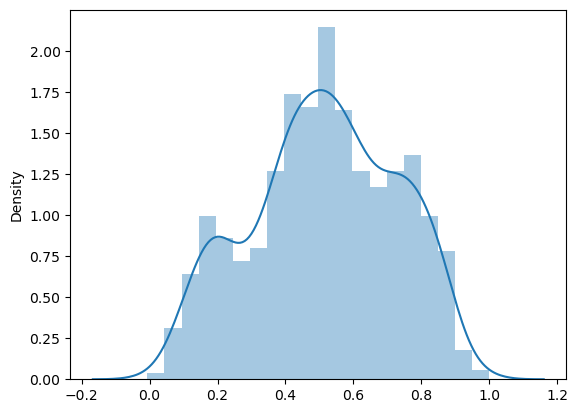

In [70]:
fig = plt.figure()
sns.distplot((y_train, y_train_cnt), bins=20)

In [71]:
df_test[var] = scaler.transform(df_test[var])

In [72]:
y_test = df_test.pop('cnt')
x_test = df_test.drop(["casual","registered"], axis=1)

In [73]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Feb,weekday_Jan,weekday_June,weekday_March,weekday_May,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [74]:
c = x_train_rfe2.drop('const', axis=1)

In [75]:
col2 = c.columns

In [76]:
x_test_rfe2 = x_test[col2]

In [77]:
x_test_rfe2 = sm.add_constant(x_test_rfe2)

In [78]:
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   temp           219 non-null    float64
 3   hum            219 non-null    float64
 4   windspeed      219 non-null    float64
 5   season_spring  219 non-null    uint8  
 6   mnth_July      219 non-null    uint8  
 7   weathersit_C   219 non-null    uint8  
dtypes: float64(4), int64(1), uint8(3)
memory usage: 10.9 KB


In [79]:
y_pred = lm2.predict(x_test_rfe2)

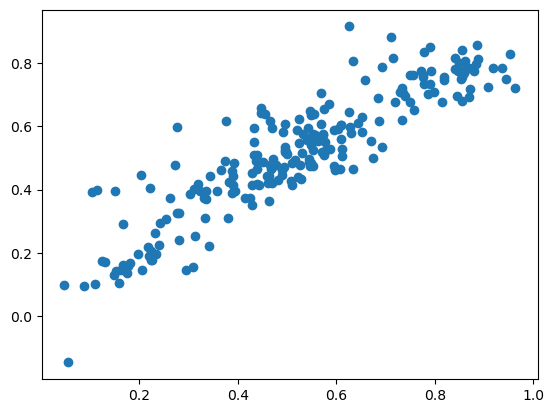

In [80]:
plt.figure()
plt.scatter(y_test, y_pred)

In [81]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8052379667298357

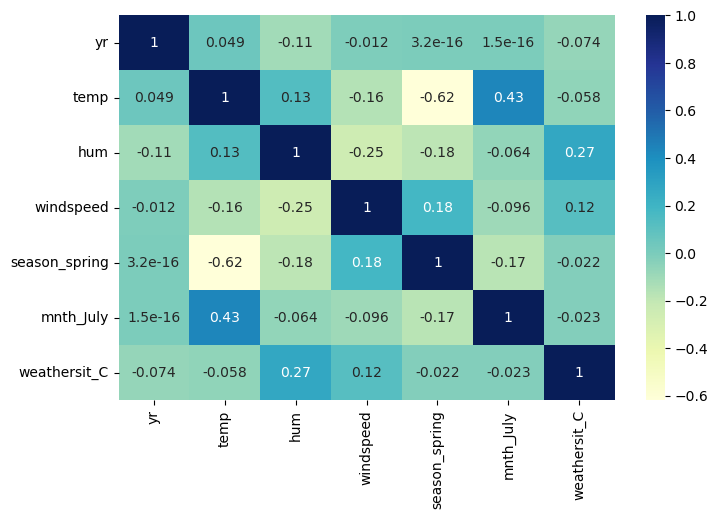

In [82]:
plt.figure(figsize=(8,5))


sns.heatmap(dataset[col2].corr(), cmap = "YlGnBu", annot=True)
plt.show()

#                               PROJECT COMPLETED 